In [1]:
import pandas as pd
import requests
from urllib.parse import urlencode
import json, datetime

api_key = "94bd224fdd23e740f91f7fc88375518f"

city = "Warsaw"

In [2]:
params = dict(
    q=city,
    appid=api_key
)

url = 'http://api.openweathermap.org/data/2.5/forecast?q={}&units=metric&APPID={}'.format(city, api_key)
r = requests.get(url)
weather = json.loads(r.text)
df = pd.DataFrame.from_dict(weather['list'])

In [3]:
from datetime import datetime

def _dict_to_val(_dict):
    try:
        return list(_dict.values())[0]
    except:
        return 0

df["clouds"] = df.apply(lambda x: x.clouds["all"], axis=1)
df["rain"] = df.apply(lambda x: _dict_to_val(x.rain), axis=1)
df["snow"] = df.apply(lambda x: _dict_to_val(x.snow), axis=1)
df["sys"] = df.apply(lambda x: list(x.sys["pod"]), axis=1)
df["dt_txt1"] = df.apply(lambda x: datetime.strptime(x.dt_txt, '%Y-%m-%d %H:%M:%S'), axis=1)
df["date"] = df.apply(lambda x: x.dt_txt1.date(), axis=1)
df["time"] = df.apply(lambda x: x.dt_txt1.time(), axis=1)

# datetime_object = datetime.strptime('Jun 1 2005  1:33PM', '%b %d %Y %I:%M%p')

df  = df.merge(df.wind.apply(lambda s: pd.Series({'wind_speed':s["speed"], 'wind_deg':s["deg"]})), 
    left_index=True, right_index=True)
df = df.merge(df.main.apply(lambda s: pd.Series({'temp':s["temp"], 'temp_min':s["temp_min"], 'temp_max':s["temp_max"], 'pressure': s['pressure'], "sea_level": s["sea_level"], "grnd_level": s["grnd_level"], "humidity": s["humidity"], "temp_kf": s["temp_kf"]})), 
    left_index=True, right_index=True)

df = df.drop(columns=["main", "wind", "weather", "dt_txt"])

In [4]:
df

,clouds,dt,rain,snow,sys,dt_txt1,date,time,wind_speed,wind_deg,temp,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,temp_kf
0,32,1546894800,0.000,0.00000,[n],2019-01-07 21:00:00,2019-01-07,21:00:00,4.56,202.5060,-6.96,-9.18,-6.96,1024.08,1037.36,1024.08,81.0,2.21
1,0,1546905600,0.000,0.00000,[n],2019-01-08 00:00:00,2019-01-08,00:00:00,5.02,195.0000,-8.65,-10.12,-8.65,1020.43,1033.79,1020.43,81.0,1.47
2,32,1546916400,0.000,0.00200,[n],2019-01-08 03:00:00,2019-01-08,03:00:00,5.65,185.0000,-9.70,-10.44,-9.70,1015.78,1029.08,1015.78,82.0,0.74
3,88,1546927200,0.000,0.04100,[n],2019-01-08 06:00:00,2019-01-08,06:00:00,6.26,182.0010,-8.24,-8.24,-8.24,1010.34,1023.44,1010.34,84.0,0.00
4,88,1546938000,0.000,0.73475,[d],2019-01-08 09:00:00,2019-01-08,09:00:00,6.76,191.0030,-4.21,-4.21,-4.21,1006.02,1018.82,1006.02,90.0,0.00
5,92,1546948800,0.000,1.83375,[d],2019-01-08 12:00:00,2019-01-08,12:00:00,6.10,196.5000,-1.58,-1.58,-1.58,1002.10,1014.75,1002.10,91.0,0.00
6,92,1546959600,0.010,0.77875,[n],2019-01-08 15:00:00,2019-01-08,15:00:00,5.12,193.0020,-0.02,-0.02,-0.02,999.05,1011.71,999.05,94.0,0.00
7,88,1546970400,0.120,0.38500,[n],2019-01-08 18:00:00,2019-01-08,18:00:00,5.61,187.5010,1.30,1.30,1.30,996.85,1009.37,996.85,95.0,0.00
8,88,1546981200,0.045,0.04125,[n],2019-01-08 21:00:00,2019-01-08,21:00:00,5.73,174.0010,1.15,1.15,1.15,995.42,1007.87,995.42,93.0,0.00
9,92,1546992000,0.125,0.22500,[n],2019-01-09 00:00:00,2019-01-09,00:00:00,4.87,171.5000,0.87,0.87,0.87,995.04,1007.57,995.04,95.0,0.00


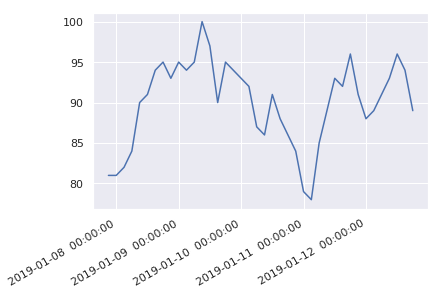

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
sns.set()
%matplotlib inline

df2 = df.loc[df["date"] == datetime.strptime("2019-01-08", "%Y-%m-%d").date()]

fig, ax = plt.subplots()
plt.plot(df["dt_txt1"], df["humidity"])

ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d  %H:%M:%S'))
fig.autofmt_xdate()
plt.show()

In [6]:
import time
from datetime import datetime
import numpy as np
from matplotlib.ticker import FuncFormatter, MaxNLocator
import matplotlib.style as style 
    
def plot_humidity(df2):
    t_dict = {}
    tList = []
    fig, ax1 = plt.subplots()
    t = 0
    df2 = df.loc[df["date"] == datetime.strptime("2019-01-08", "%Y-%m-%d").date()]
    date_time_list = df2["dt_txt1"].tolist()
    while t < len(date_time_list):
        ti = int(time.mktime(date_time_list[t].timetuple()))
        t_dict[ti] = date_time_list[t]
        tList.append(ti)
        t = t + 1

    ax1.plot(tList, df2["humidity"],'ro')

    z = np.polyfit(tList, df2["humidity"], 25)
    f = np.poly1d(z)
    x_new = np.linspace(tList[0], tList[-1], 50)
    y_new = f(x_new)
    ax1.plot(x_new, y_new, color="blue")

    ax1.set_ylabel('Humidity')
    ax1.set_xlabel('time')
    ax1.set_facecolor('xkcd:pale')

    ax1.set_xticks(date_time_list)
    # ax1.xaxis.set_major_formatter(FuncFormatter(format_fn))
    # ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax1.autoscale(tight=True)

    ax2 = ax1.twinx()

    color = 'tab:blue'
    ax2.bar([t -500 for t in tList], df2["snow"], color=color, width=1000)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.set_ylim([df2["snow"].min() ,df2["snow"].max() + 10])


    color = 'tab:green'
    ax2.bar([t +500 for t in tList], df2["rain"], color=color, width=1000)
    fig.tight_layout()

    plt.show()

/home/danalscy/.local/lib/python3.6/site-packages/numpy/lib/polynomial.py:578: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/home/danalscy/.local/lib/python3.6/site-packages/ipykernel_launcher.py:22: RankWarning: Polyfit may be poorly conditioned


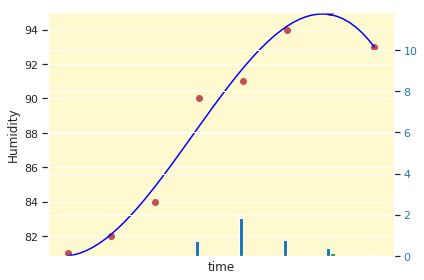

In [7]:
plot_humidity(df2)

**Plot pressure**

/home/danalscy/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


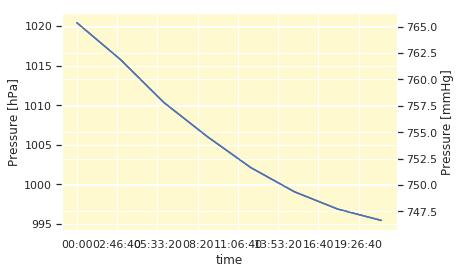

In [8]:
def plot_pressure(df2):
    fig, ax1 = plt.subplots()
    df2["pressure_mmHg"] = df2.apply(lambda x: x.pressure*0.7500616827, axis=1)

    ax1.set_xlabel('time')
    ax1.set_ylabel('Pressure [hPa]')
    ax1.plot(df2["time"], df2["pressure"])
    ax1.tick_params(axis='y')
    ax1.set_facecolor('xkcd:pale')
    ax2 = ax1.twinx()

    ax2.plot(df2["time"], df2["pressure_mmHg"])
    ax2.set_ylabel('Pressure [mmHg]')
    
plot_pressure(df2)

**Wind**

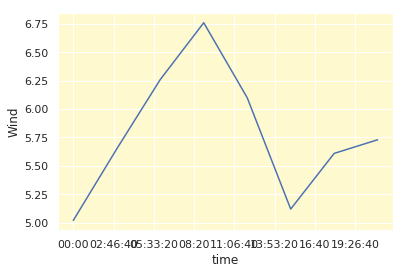

In [9]:
def plot_wind(df2):
    fig, ax1 = plt.subplots()
#     df2 = df.loc[df["date"] == datetime.strptime("2019-01-08", "%Y-%m-%d").date()]

    ax1.set_xlabel('time')
    ax1.set_ylabel('Wind')
    ax1.plot(df2["time"], df2["wind_speed"])
    ax1.tick_params(axis='y')
    ax1.set_facecolor('xkcd:pale')

plot_wind(df2)